In [57]:
import requests
import sys
import pandas as pd
import numpy as np
from scipy import sparse
from io import StringIO
import networkscience as ns
from matplotlib import pyplot as plt
import seaborn as sns

In [58]:
reply = requests.get('https://data.europa.eu/euodp/data/storage/f/2020-08-11T140550/Finalised%20mobilities%20started%20in%202018%20-%20KA1.csv')
reply.encoding = 'utf-8'

In [59]:
csv_data = reply.text
df = pd.read_csv(StringIO(csv_data), sep=';',low_memory=False, header=0)
for i, name in enumerate(df.columns):
    print(i, name)

0 Project Reference
1 Academic Year
2 Mobility Start Month
3 Mobility End Month
4 Mobility Duration
5 Activity (mob)
6 Field of Education
7 Participant Nationality
8 Education Level
9 Participant Gender
10 Participant Profile
11 Special Needs
12 Fewer Opportunities
13 Participant Age
14 Sending Country Code
15 Sending City
16 Sending Organization
17 Receiving Country Code
18 Receiving City
19 Receiving Organization
20 Participants


In [60]:
pd.options.display.max_columns=21
display(df)

,Project Reference,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2015-3-PT02-KA105-002866,2017-18,2018-01,2018-05,146,European Voluntary Service - Programme Countries,???,PT,??? - ???,Male,Learner,No,No,22,PT,VISEU,ADAMASTOR - ASSOCIACAO CULTURAL,PL,Poznań,Stowarzyszenie Jeden Swiat,1
1,2015-3-PT02-KA105-002866,2017-18,2018-01,2018-05,146,European Voluntary Service - Programme Countries,???,PT,??? - ???,Male,Learner,No,Yes,26,PT,VISEU,ADAMASTOR - ASSOCIACAO CULTURAL,PL,Poznań,Stowarzyszenie Jeden Swiat,1
2,2016-1-AT01-KA101-016290,2017-18,2018-01,2018-01,6,Structured Courses/Training Events,Teacher training without subject specialization,AT,??? - ???,Female,Staff,No,No,27,AT,Wien,Neue Mittelschule Glasergasse,SI,Portoro�,Osnovna sola Lucija,1
3,2016-1-AT01-KA101-016290,2017-18,2018-01,2018-01,6,Structured Courses/Training Events,Teacher training without subject specialization,AT,??? - ???,Female,Staff,No,No,28,AT,Vienna,NMSI & JHS Konstanziagasse 50,SI,Portoro�,Osnovna sola Lucija,1
4,2016-1-AT01-KA101-016290,2017-18,2018-01,2018-01,6,Structured Courses/Training Events,Teacher training without subject specialization,AT,??? - ???,Female,Staff,No,No,35,AT,Wien,GTKMS/GTNMS Anton-Sattler-Gasse,SI,Portoro�,Osnovna sola Lucija,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688505,2018-2-UK01-KA125-048625,2018-19,2018-09,2019-07,319,Individual Volunteering Activities,???,ES,??? - ???,Female,Learner,No,No,21,ES,Madrid,Asociación para la integración y Progreso de l...,UK,Stackpole,The National Trust for Places of Historic Inte...,1
688506,2018-2-UK01-KA125-048626,2018-19,2018-10,2019-03,137,Individual Volunteering Activities,???,ES,??? - ???,Male,Learner,No,No,27,ES,BARCELONA,COORDINADORA D'ORGANITZADORS DE CAMPS DE TREBA...,UK,LONDON,VOLUNTEER ACTION FOR PEACE,1
688507,2018-2-UK01-KA125-048626,2018-19,2018-11,2019-04,170,Individual Volunteering Activities,???,CZ,??? - ???,Female,Learner,No,No,24,CZ,PRAHA,INEX - SDRUZENI DOBROVOLNYCH AKTIVIT Z S,UK,LONDON,VOLUNTEER ACTION FOR PEACE,1
688508,2018-2-UK01-KA125-048626,2018-19,2018-11,2019-10,351,Individual Volunteering Activities,???,FR,??? - ???,Male,Learner,No,No,23,FR,PARIS,SOLIDARITES JEUNESSES MCP,UK,LONDON,VOLUNTEER ACTION FOR PEACE,1


In [61]:
mobility_df = df[df[df.columns[10]]=='Learner']
mobility_df = mobility_df[mobility_df['Activity (mob)'].str.contains('Student')]
mobility_df = mobility_df[~mobility_df['Activity (mob)'].str.contains('traineeship')]
# consideriamo solo l'anno accademico 2018/2019 o 2017/2018?
# i numeri cambiano parecchio di anno in anno, è normale?
#mobility_df = mobility_df[mobility_df['Academic Year'].str.contains('19')]
mobility_df = mobility_df.loc[:, df.columns[np.array((16, 19, 20, 5))]]
print((mobility_df['Receiving Organization'].nunique()))
print((mobility_df['Sending Organization'].nunique()))

3759
4264


In [62]:
for index in range(len(mobility_df['Sending Organization'])):
    s_uni = mobility_df.iat[index,0]
    r_uni = mobility_df.iat[index,1]
    if s_uni != s_uni.upper():
        mobility_df.iat[index,0] = s_uni.upper()
    if r_uni != r_uni.upper():
        mobility_df.iat[index,1] = r_uni.upper()

print('Number of Receiving Universities: ',(mobility_df['Receiving Organization'].nunique()))
print('Number of Sending Universities: ',(mobility_df['Sending Organization'].nunique()))
mobility_df


Number of Receiving Universities:  3668
Number of Sending Universities:  4189


,Sending Organization,Receiving Organization,Participants,Activity (mob)
174,VORARLBERGER LANDESKONSERVATORIUM,LUNDS UNIVERSITET,1,Student mobility for studies between Programme...
195,NATIONAL MINING UNIVERSITY,MONTANUNIVERSITAT LEOBEN,1,Student mobility for Studies To/From Partner C...
196,NATIONAL MINING UNIVERSITY,MONTANUNIVERSITAT LEOBEN,1,Student mobility for Studies To/From Partner C...
197,NATIONAL MINING UNIVERSITY,MONTANUNIVERSITAT LEOBEN,1,Student mobility for Studies To/From Partner C...
198,MONTANUNIVERSITAT LEOBEN,THE NATIONAL MINERAL RESOURCES UNIVERSITY (THE...,1,Student mobility for Studies To/From Partner C...
...,...,...,...,...
667190,UNIVERSITY COLLEGE LONDON,FEDERAL STATE AUTONOMOUS EDUCATIONAL INSTITUTI...,1,Student mobility for Studies To/From Partner C...
667191,UNIVERSITY COLLEGE LONDON,FEDERAL STATE AUTONOMOUS EDUCATIONAL INSTITUTI...,1,Student mobility for Studies To/From Partner C...
667192,FEDERAL STATE AUTONOMOUS EDUCATIONAL INSTITUTI...,UNIVERSITY COLLEGE LONDON,1,Student mobility for Studies To/From Partner C...
667193,UNIVERSITY COLLEGE LONDON,THE HEBREW UNIVERSITY OF JERUSALEM,1,Student mobility for Studies To/From Partner C...


In [63]:
nodes = np.array(list(set.union(set(mobility_df.loc[:, mobility_df.columns[0]]), set(mobility_df.loc[:, mobility_df.columns[1]]))))
node_position = {}
for i, name in enumerate(nodes):
    node_position[name] = i
nodes_df = pd.DataFrame({'Nodes': nodes})
mobility_df['SendId'] = (np.array(list(map(lambda x: node_position[x], mobility_df['Sending Organization']))))
mobility_df['RecId']= (np.array(list(map(lambda x: node_position[x], mobility_df['Receiving Organization']))))
# Adjacency matrix
adj_matrix_crs = sparse.csr_matrix((nodes.size, nodes.size),dtype=int)
adj_matrix_csc = sparse.csc_matrix((nodes.size, nodes.size),dtype=int)

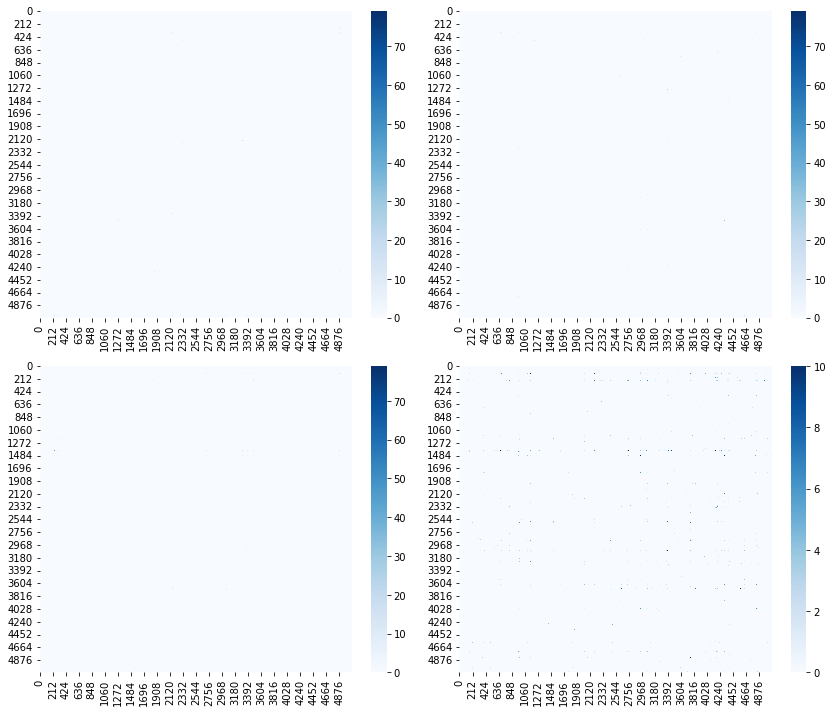

In [64]:
mobility_serie = mobility_df.groupby(['SendId', 'RecId']).sum()
row = np.array(mobility_serie.index.get_level_values(1).tolist())
col = np.array(mobility_serie.index.get_level_values(0).tolist())
val = mobility_serie.values
adj_matrix_crs = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))

# cercasi 70 Gb di ram, no perditempo
ns.visualize_adj(adj_matrix_crs)

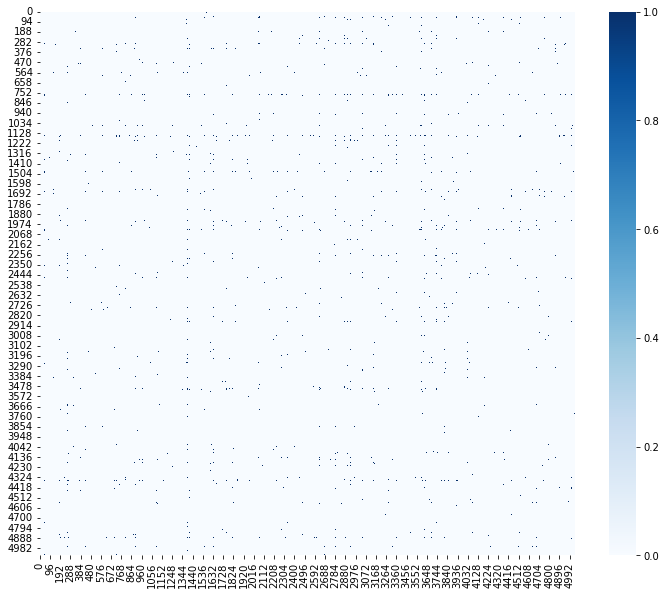

In [72]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
a_adj = adj_matrix_crs.toarray()
a_adj[a_adj>1] = 1
sns.heatmap(a_adj, cmap="Blues", ax=ax)
plt.show()

In [65]:
mobility_df.rename({'Sending Organization': 'source','Receiving Organization': 'target', 'Participants':'weight'},axis=1, inplace=True)
adj_matrix_crs, mobility_df, nodes_df = ns.keep_giant(ns.find_components(adj_matrix_crs, nodes_df), mobility_df)

### Degree distribution

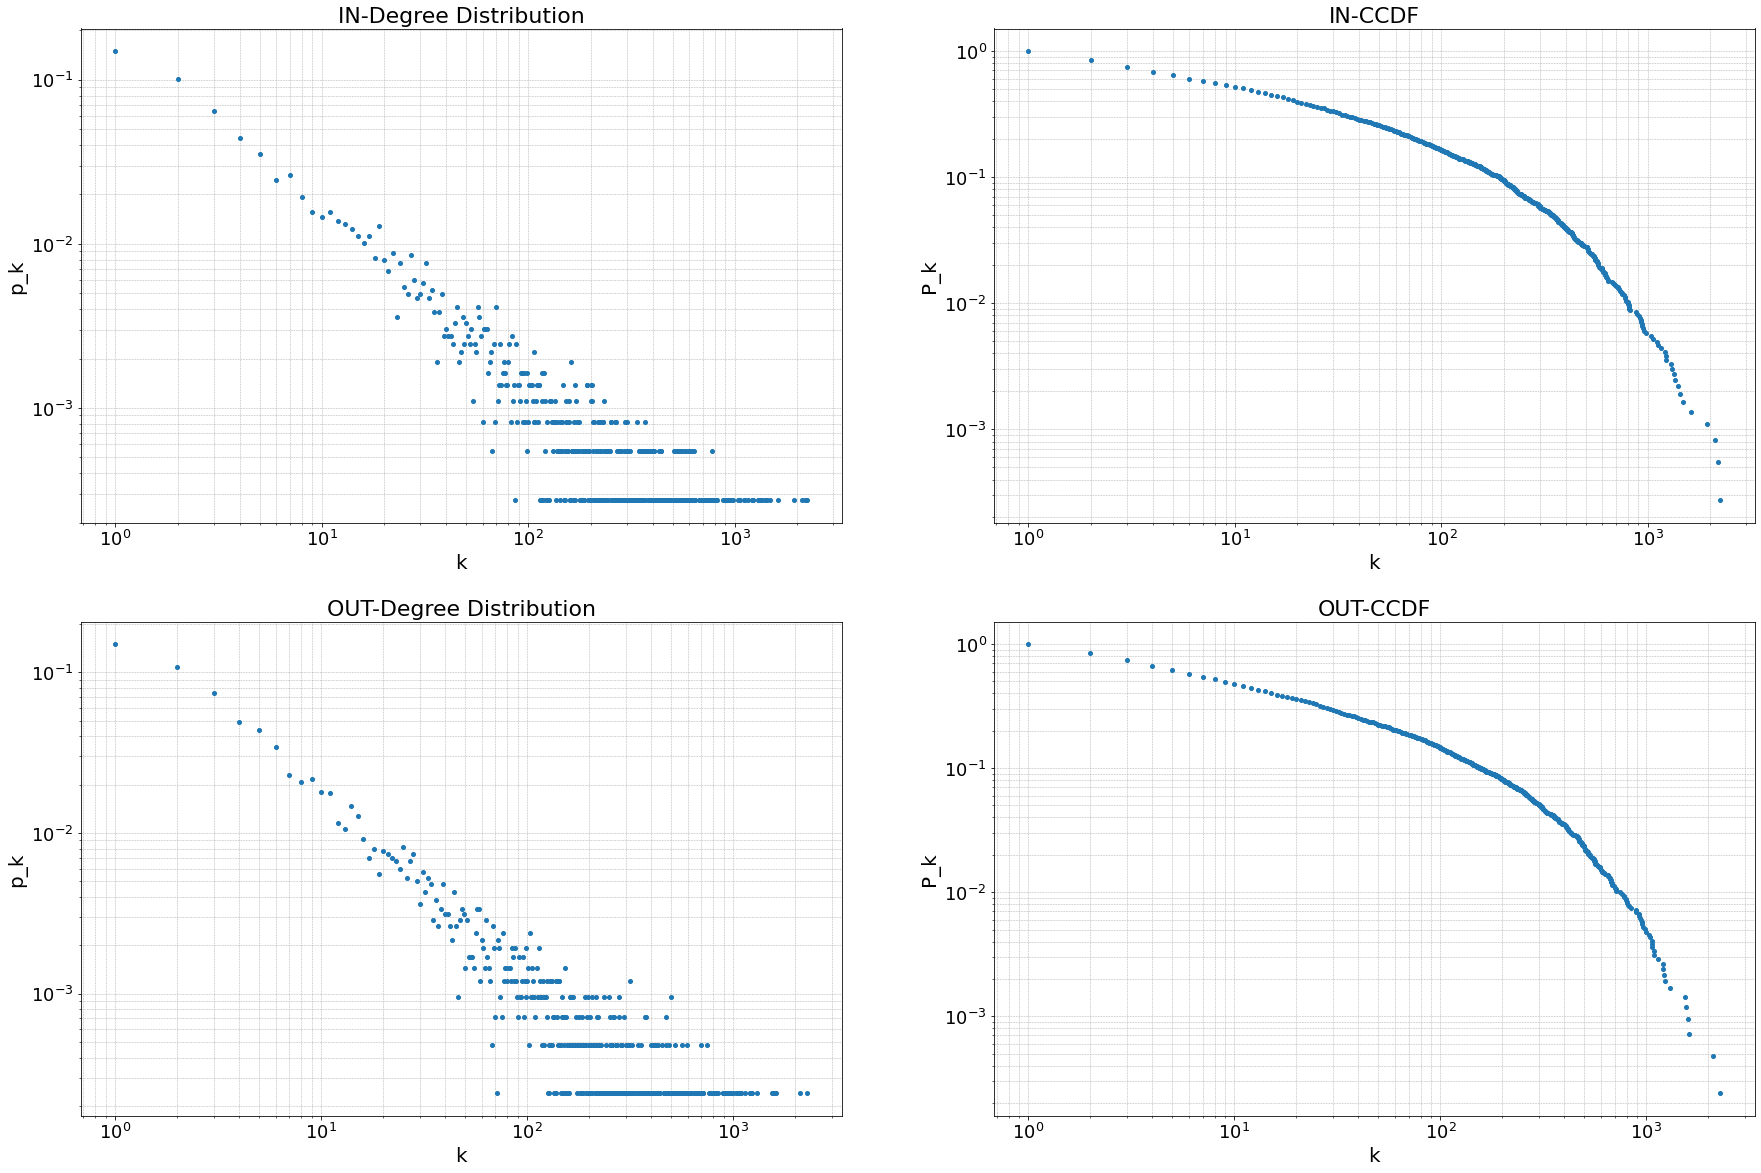

Top 10 for in degree


,Nodes,in degree
3697,UNIVERSITAT DE VALENCIA,2239
3357,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,2181
1392,UNIVERSIDADE DE LISBOA,2118
4314,UNIVERSIDAD DE GRANADA,1934
850,UNIVERSIDAD COMPLUTENSE DE MADRID,1615
238,UNIVERZA V LJUBLJANI,1483
1719,UNIVERSITAT POLITECNICA DE VALENCIA,1436
1203,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,1406
78,UNIVERSIDAD DE SEVILLA,1352
633,KATHOLIEKE UNIVERSITEIT LEUVEN,1340


Top 10 for out degree


,Nodes,out degree
3357,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,2280
4314,UNIVERSIDAD DE GRANADA,2114
3697,UNIVERSITAT DE VALENCIA,1604
850,UNIVERSIDAD COMPLUTENSE DE MADRID,1590
2835,UNIVERSITA DEGLI STUDI DI PADOVA,1563
768,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,1544
1612,UNIVERSITA DEGLI STUDI DI TORINO,1299
1392,UNIVERSIDADE DE LISBOA,1230
633,KATHOLIEKE UNIVERSITEIT LEUVEN,1218
328,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,1206


In [66]:
scores = ns.degree_disribution(adj_matrix_crs, nodes_df, print_graph=True)
ns.display_top_n(scores, 10, 'in degree')
ns.display_top_n(scores, 10, 'out degree')

### HITS (NetworkX)

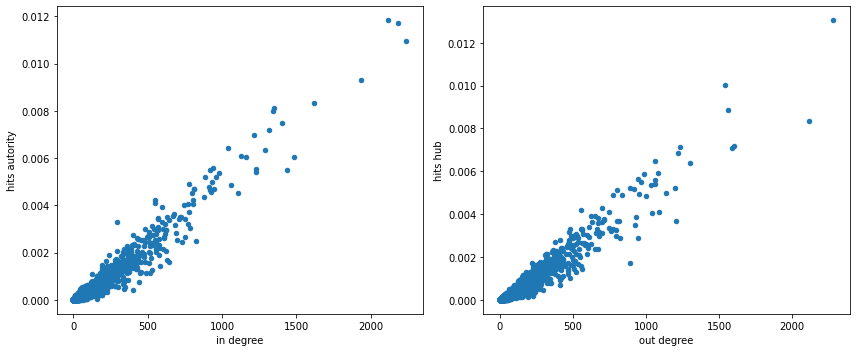

Top 10 for hits hub


,Nodes,hits hub
3357,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.013047
768,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.010031
2835,UNIVERSITA DEGLI STUDI DI PADOVA,0.008866
4314,UNIVERSIDAD DE GRANADA,0.008332
3697,UNIVERSITAT DE VALENCIA,0.007194
1392,UNIVERSIDADE DE LISBOA,0.007115
850,UNIVERSIDAD COMPLUTENSE DE MADRID,0.007101
633,KATHOLIEKE UNIVERSITEIT LEUVEN,0.006870
4000,TECHNISCHE UNIVERSITAET MUENCHEN,0.006476
1612,UNIVERSITA DEGLI STUDI DI TORINO,0.006369


Top 10 for hits autority


,Nodes,hits autority
1392,UNIVERSIDADE DE LISBOA,0.011827
3357,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.011717
3697,UNIVERSITAT DE VALENCIA,0.010963
4314,UNIVERSIDAD DE GRANADA,0.009295
850,UNIVERSIDAD COMPLUTENSE DE MADRID,0.008322
78,UNIVERSIDAD DE SEVILLA,0.008102
633,KATHOLIEKE UNIVERSITEIT LEUVEN,0.007990
1203,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,0.007498
2786,UNIVERZITA KARLOVA,0.007183
1149,UNIVERSITAT DE BARCELONA,0.006963


In [67]:
df = ns.hits_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'hits hub')
ns.display_top_n(scores, 10, 'hits autority')

### PageRank (NetworkX)

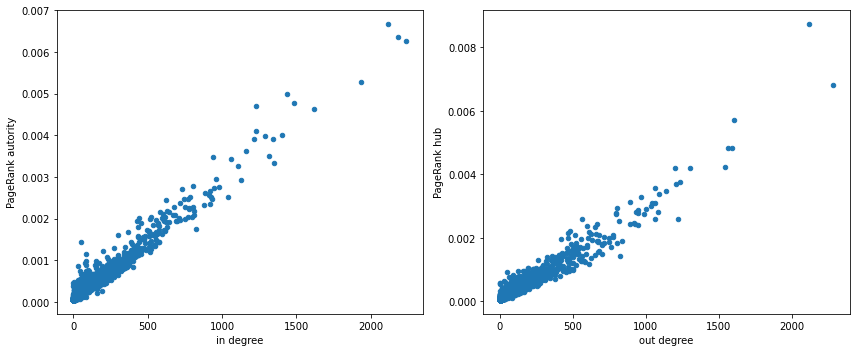

Top 10 for PageRank hub


,Nodes,PageRank hub
4314,UNIVERSIDAD DE GRANADA,0.008724
3357,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006795
3697,UNIVERSITAT DE VALENCIA,0.005713
850,UNIVERSIDAD COMPLUTENSE DE MADRID,0.004827
2835,UNIVERSITA DEGLI STUDI DI PADOVA,0.004826
768,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.004223
4362,UNIVERSIDAD POLITECNICA DE MADRID,0.004187
1612,UNIVERSITA DEGLI STUDI DI TORINO,0.004185
1392,UNIVERSIDADE DE LISBOA,0.003746
328,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,0.003685


Top 10 for PageRank autority


,Nodes,PageRank autority
1392,UNIVERSIDADE DE LISBOA,0.006671
3357,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006371
3697,UNIVERSITAT DE VALENCIA,0.006263
4314,UNIVERSIDAD DE GRANADA,0.005291
1719,UNIVERSITAT POLITECNICA DE VALENCIA,0.004997
238,UNIVERZA V LJUBLJANI,0.004764
261,POLITECNICO DI MILANO,0.004715
850,UNIVERSIDAD COMPLUTENSE DE MADRID,0.004639
2835,UNIVERSITA DEGLI STUDI DI PADOVA,0.004098
1203,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,0.004001


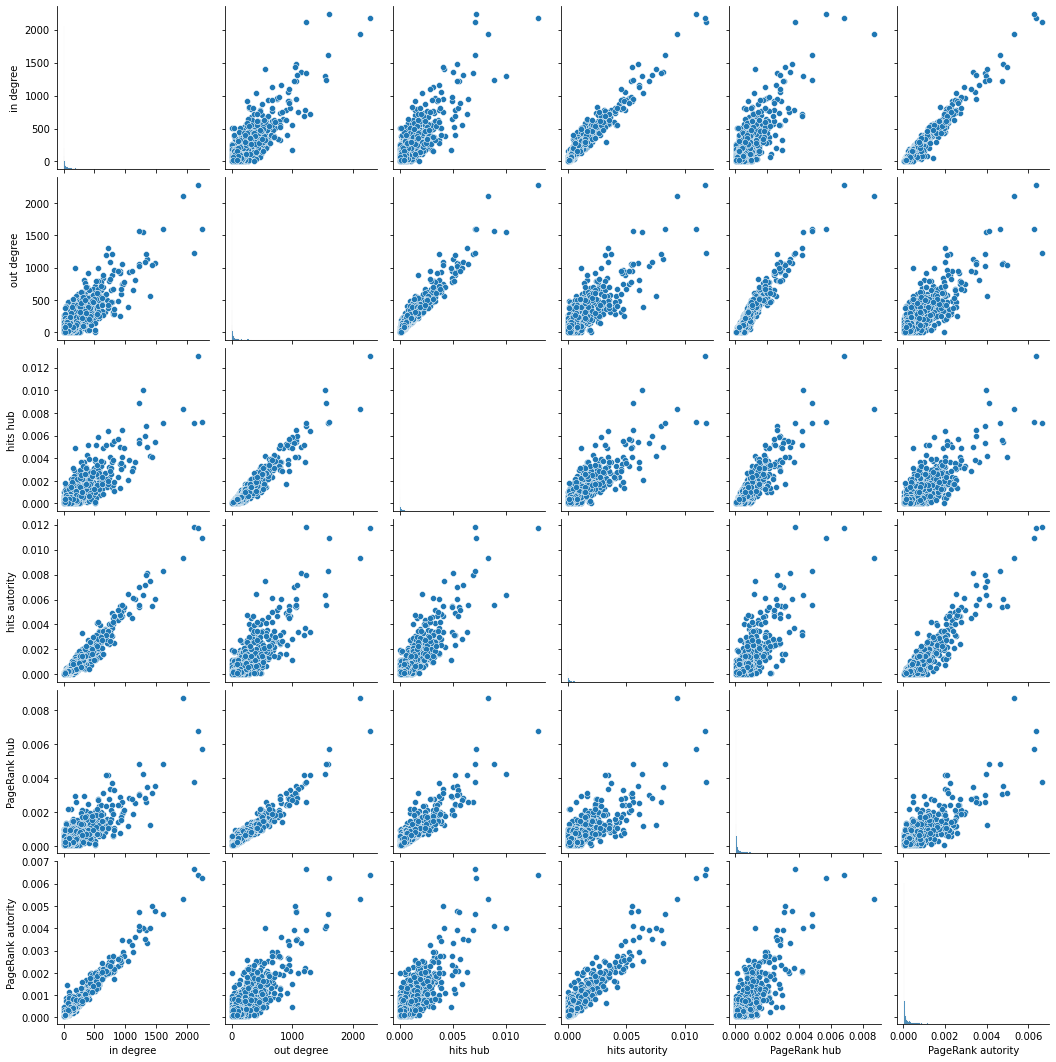

In [68]:
df = ns.pagerank_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'PageRank hub')
ns.display_top_n(scores, 10, 'PageRank autority')
# ci vuole troppo a farlo
sns.pairplot(scores[['in degree', 'out degree',  'hits hub',
       'hits autority', 'PageRank hub', 'PageRank autority']])
plt.show()
# from IPython.display import Image
# Image('pairplot_score.png',)

### Assortativity

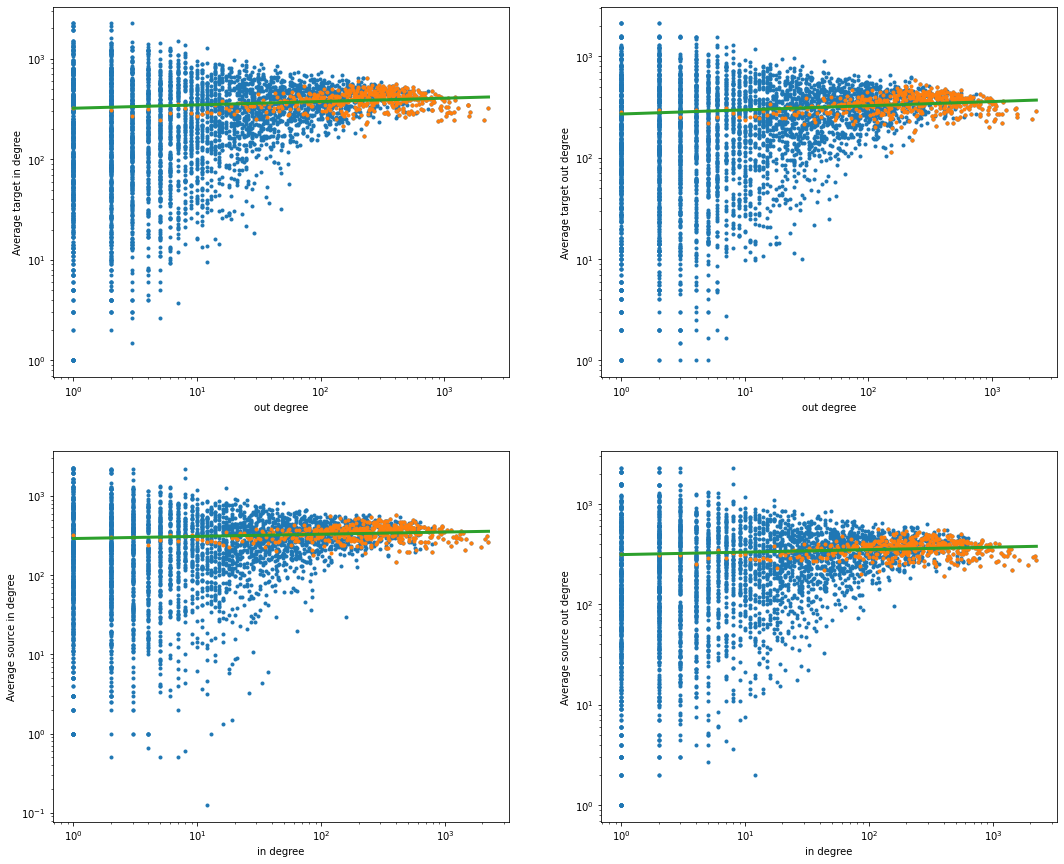

(0.03327460057579346,
 0.0408980364797933,
 0.02728498860993891,
 0.024645650714904703)

In [69]:
edges = mobility_df.copy()
ns.assortativity_calc(edges, adj_matrix_crs, nodes_df, True)